In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [3]:
importlib.reload(ExperimentClass)
control = ExperimentClass.Experiment("20240227_NaCO3_WT3_control", "Fluo_Liquide")
bicarbonate = ExperimentClass.Experiment("20240227_NaCO3_WT3_bic", "Fluo_Liquide")
time = (control.Time - control.Time[0])/1000

fig_folder = bicarbonate.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)



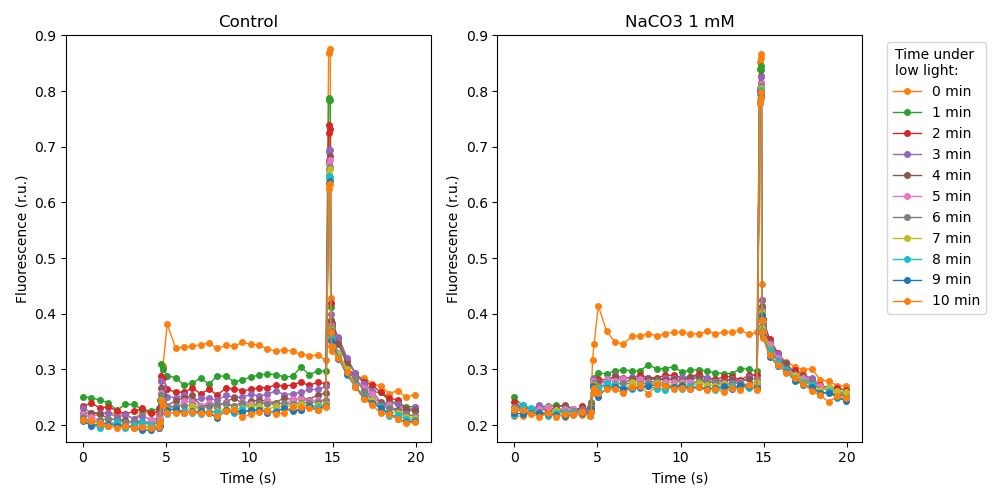

In [5]:
exp_time = np.arange(-1, 11)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
for k, exp in enumerate([control, bicarbonate]):
    for i, key in enumerate(exp.Data.keys()):
        if i != 0:
            ax[k].plot(time, exp.Data[key]/max(exp.Data.iloc[:,0]), 'o-', label = f"{exp_time[i]} min", markersize = 4, linewidth = 1, color = f"C{i}")
        ax[k].set_xlabel("Time (s)")
        ax[k].set_ylabel("Fluorescence (r.u.)")
        ax[k].set_ylim(0.17, 0.9)
ax[0].set_title("Control")
ax[1].set_title("NaCO3 1 mM")
ax[1].legend(title = "Time under \nlow light:", bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
fig.savefig(fig_folder + "/All_acq.png", dpi = 300)

In [6]:
tools.closest_index(time, 14.6)

32

In [7]:
def compute_params(Data_df):
    
    F_max = []
    F_stat = []
    F_0 = []
    phi_stat = []
    phi_0 = []
    NPQ = []
    ETR = []

    for i, k in enumerate(Data_df.keys()):
        F_max.append(np.mean(Data_df[k][33:36]))
        F_0.append(np.mean(Data_df[k][2:11]))
        F_stat.append(np.mean(Data_df[k][25:32]))
        phi_stat.append((F_max[i] - F_stat[i]) / F_max[i])
        phi_0.append((F_max[i] - F_0[i]) / F_max[i])
        NPQ.append((F_max[0] - F_max[i])/F_max[i])
        
    norm = F_max[0]
    
    F_max = list(np.array(F_max)/norm)
    F_stat = list(np.array(F_stat)/norm)
    F_0 = list(np.array(F_0)/norm)
        
    params_df = pd.DataFrame({'F_max': F_max, 'F_stat': F_stat, 'F_0': F_0, 'phi_stat': phi_stat, 'phi_0': phi_0, 'NPQ': NPQ})
    
    return params_df
    
def actinic_light_axes(ax, Acquisitions_df, params_df):
    ax[0].plot(Acquisitions_df.Actinic, params_df.F_max, '-', linewidth = 0.5, label = 'F_max')
    ax[0].plot(Acquisitions_df.Actinic, params_df.F_0, '-', linewidth = 0.5, label = 'F_0')
    ax[0].plot(Acquisitions_df.Actinic, params_df.F_stat, '-', linewidth = 0.5, label = 'F_stat')
    ax[0].legend()  

    ax[1].plot(Acquisitions_df.Actinic, params_df.phi_stat, '-', linewidth = 0.5, label = 'phi_stat')
    ax[1].plot(Acquisitions_df.Actinic, params_df.phi_0, '-', linewidth = 0.5, label = 'phi_0')
    ax[1].legend()

    ax[2].plot(Acquisitions_df.Actinic, params_df.NPQ, '-', linewidth = 0.5, label = 'NPQ')
    ax[2].legend()
    
    return ax
        

In [8]:
control_params = compute_params(control.Data)
bicarbonate_params = compute_params(bicarbonate.Data)
control_params

,F_max,F_stat,F_0,phi_stat,phi_0,NPQ
0,1.000000,0.230746,0.225676,0.769254,0.774324,0.000000
1,0.872812,0.331649,0.220198,0.620022,0.747715,0.145722
2,0.787781,0.293523,0.235679,0.627405,0.700831,0.269388
3,0.734191,0.273159,0.227224,0.627946,0.690511,0.362044
4,0.695248,0.259991,0.217220,0.626046,0.687564,0.438335
5,0.678814,0.247282,0.209599,0.635714,0.691228,0.473158
6,0.670597,0.242842,0.206145,0.637872,0.692595,0.491209
7,0.657735,0.240086,0.207098,0.634981,0.685135,0.520369
8,0.652376,0.234574,0.201143,0.640432,0.691676,0.532859
9,0.644516,0.229215,0.200310,0.644362,0.689209,0.551552


In [9]:
bicarbonate_params

,F_max,F_stat,F_0,phi_stat,phi_0,NPQ
0,1.000000,0.232797,0.232780,0.767203,0.767220,0.000000
1,0.866275,0.369039,0.222184,0.573993,0.743518,0.154368
2,0.846925,0.298845,0.234393,0.647141,0.723242,0.180743
3,0.820318,0.288034,0.230246,0.648875,0.719320,0.219040
4,0.820663,0.284332,0.230131,0.653534,0.719579,0.218526
5,0.813753,0.282851,0.231283,0.652411,0.715782,0.228875
6,0.810988,0.277668,0.229555,0.657618,0.716944,0.233063
7,0.807878,0.277372,0.227252,0.656666,0.718705,0.237810
8,0.799931,0.273373,0.224257,0.658254,0.719654,0.250108
9,0.797167,0.268931,0.224372,0.662642,0.718538,0.254443


In [10]:
np.arange(-1, 10)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

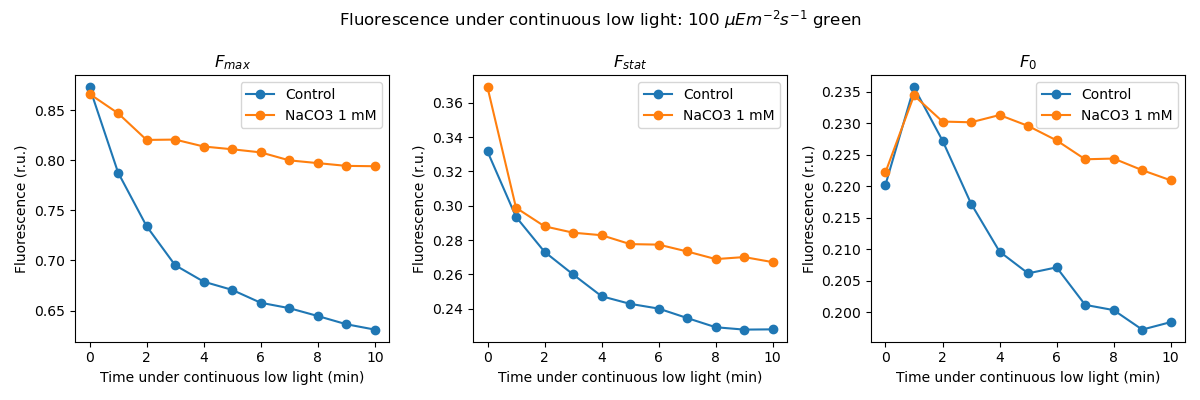

In [11]:
exp_time = np.arange(0, 11)
fig, ax = plt.subplots(1,3, figsize = (12, 4))
ax[0].plot(exp_time, control_params.F_max[1:], 'o-', label = 'Control')
ax[0].plot(exp_time, bicarbonate_params.F_max[1:], 'o-', label = 'NaCO3 1 mM')
ax[1].plot(exp_time, control_params.F_stat[1:], 'o-', label = 'Control')
ax[1].plot(exp_time, bicarbonate_params.F_stat[1:], 'o-', label = 'NaCO3 1 mM')
ax[2].plot(exp_time, control_params.F_0[1:], 'o-', label = 'Control')
ax[2].plot(exp_time, bicarbonate_params.F_0[1:], 'o-', label = 'NaCO3 1 mM')

for axes in ax:
    axes.set_xlabel('Time under continuous low light (min)')
    axes.set_ylabel('Fluorescence (r.u.)')
    axes.legend()
ax[0].set_title('$F_{max}$')
ax[1].set_title('$F_{stat}$')
ax[2].set_title('$F_{0}$')

fig.suptitle('Fluorescence under continuous low light: 100 $µEm^{-2}s^{-1}$ green')
fig.tight_layout()
fig.savefig(fig_folder + "/Fluorescence_yield.png", dpi = 300)



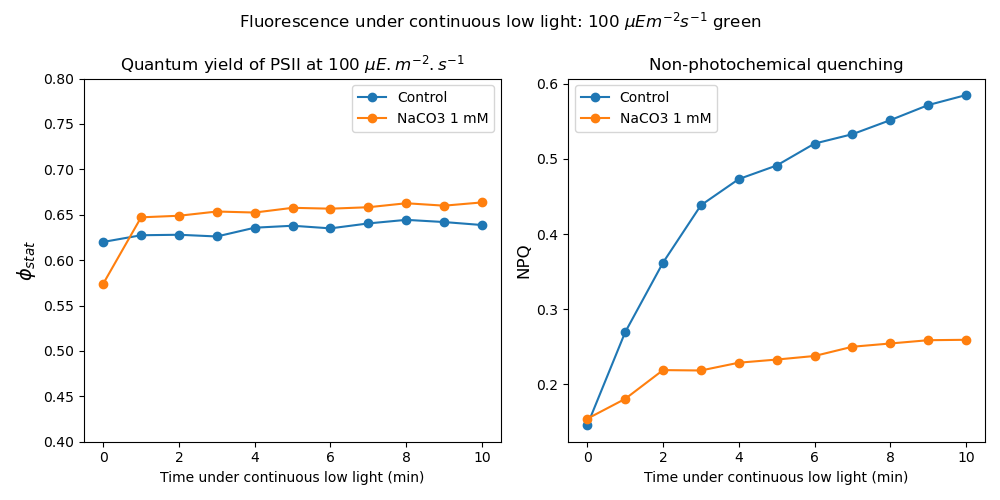

In [12]:
exp_time = np.arange(0, 11)
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(exp_time, control_params.phi_stat[1:], 'o-' ,label = 'Control')
ax[0].plot(exp_time, bicarbonate_params.phi_stat[1:], 'o-' , label = 'NaCO3 1 mM')
ax[0].set_ylim(0.4, 0.8)
ax[0].set_ylabel('$\phi_{stat}$', fontsize = 14)
ax[0].set_title('Quantum yield of PSII at 100 $µE.m^{-2}.s^{-1}$')
ax[1].plot(exp_time, control_params.NPQ[1:], 'o-' , label = 'Control')
ax[1].plot(exp_time, bicarbonate_params.NPQ[1:], 'o-' , label = 'NaCO3 1 mM')
ax[1].set_title('Non-photochemical quenching')
ax[1].set_ylabel('NPQ', fontsize = 12)

for axes in ax:
    axes.set_xlabel('Time under continuous low light (min)')
    axes.legend()
fig.suptitle('Fluorescence under continuous low light: 100 $µEm^{-2}s^{-1}$ green')
fig.tight_layout()
fig.savefig(fig_folder + "/Quantum_yield_NPQ.png", dpi = 300)

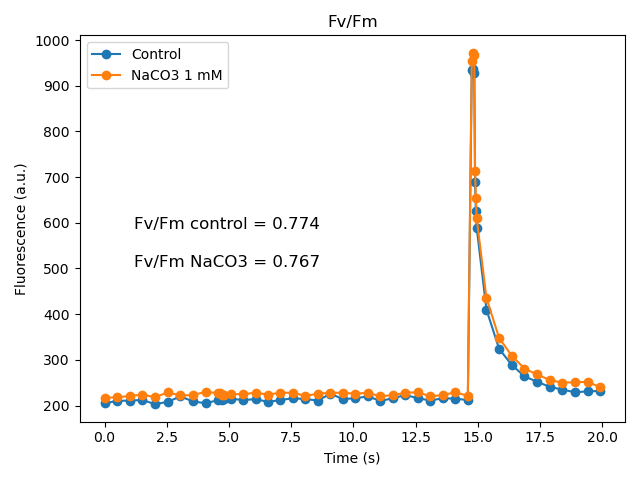

In [13]:
fig, ax = plt.subplots()
ax.plot(time, control.Data.iloc[:, 0], 'o-', label = 'Control')
ax.plot(time, bicarbonate.Data.iloc[:, 0], 'o-', label = 'NaCO3 1 mM')
ax.text(0.1, 0.5, f'Fv/Fm control = {control_params.phi_0[0]:.3f}', fontsize = 12, transform=ax.transAxes)
ax.text(0.1, 0.4, f'Fv/Fm NaCO3 = {bicarbonate_params.phi_0[0]:.3f}', fontsize = 12, transform=ax.transAxes)
ax.legend(loc = 'upper left')
ax.set_title('Fv/Fm')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Fluorescence (a.u.)')    
fig.tight_layout()
fig.savefig(fig_folder + "/FvFm.png", dpi = 300)